In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [2]:
train = pd.read_csv(r"C:\Users\Shubhamjangid\Documents\train_loan.csv")
test = pd.read_csv(r"C:\Users\Shubhamjangid\Documents\test_loan.csv")

In [3]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


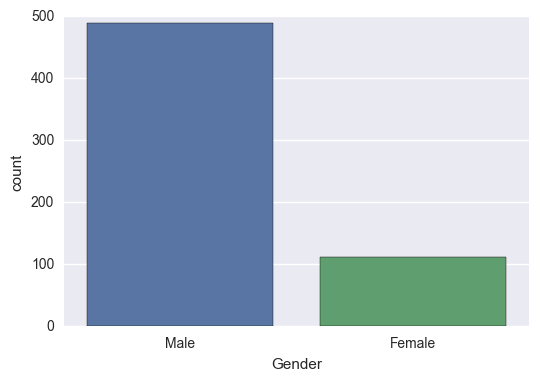

In [7]:
sns.countplot(x='Gender', data=train)

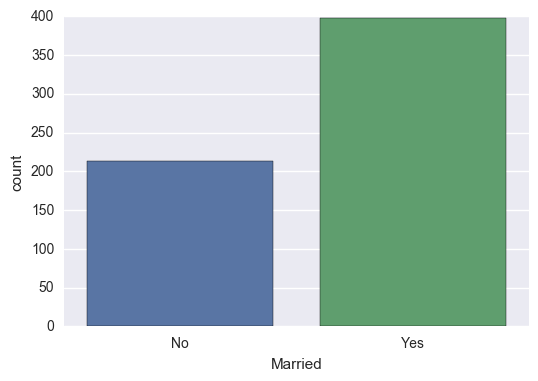

In [8]:
sns.countplot(x='Married', data=train)

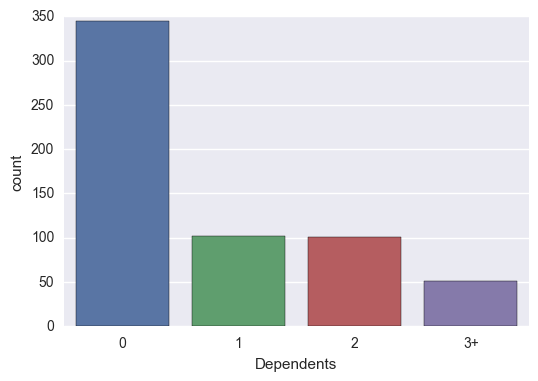

In [9]:
sns.countplot(x='Dependents', data=train)

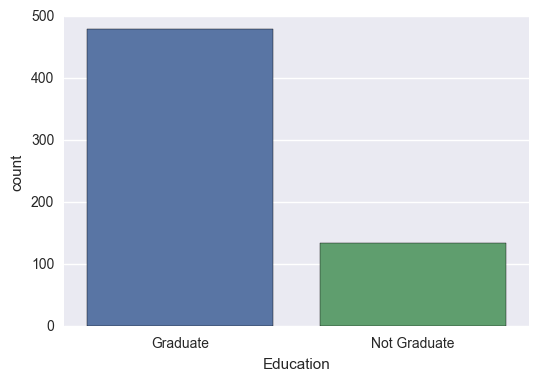

In [10]:
sns.countplot(x='Education', data=train)

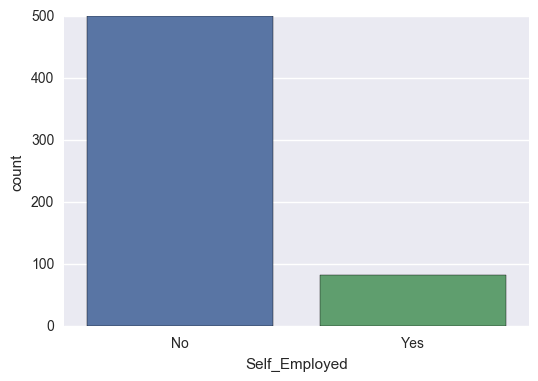

In [11]:
sns.countplot(x='Self_Employed', data=train)

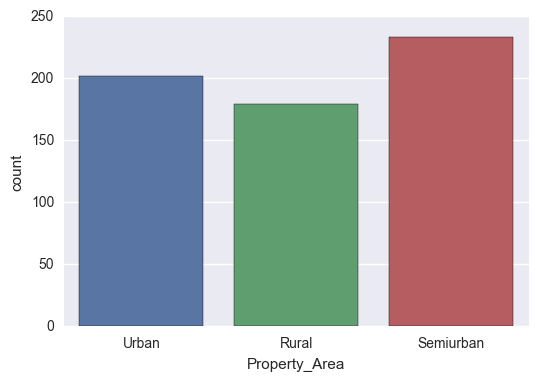

In [12]:
sns.countplot(x='Property_Area', data=train)

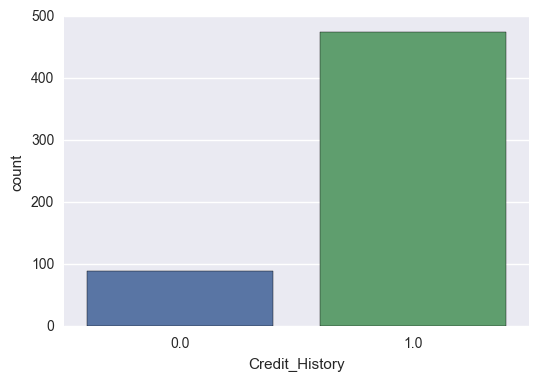

In [13]:
sns.countplot(x='Credit_History', data=train)

In [14]:
train['Gender'] = train['Gender'].fillna('Male')
test['Gender'] = test['Gender'].fillna('Male')

train['Married'] = train['Married'].fillna('Yes')

train['Dependents'] = train['Dependents'].fillna(0)
train.loc[train['Dependents']=='3+', 'Dependents'] = 3
test['Dependents'] = test['Dependents'].fillna(0)
test.loc[test['Dependents']=='3+', 'Dependents'] = 3

train['Self_Employed'] = train['Self_Employed'].fillna('No')
test['Self_Employed'] = test['Self_Employed'].fillna('No')

train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())

train['Credit_History'] = train['Credit_History'].fillna(1.0)
test['Credit_History'] = test['Credit_History'].fillna(1.0)

In [15]:
train.loc[train['Gender']=='Male', 'Gender'] = 0
train.loc[train['Gender']=='Female', 'Gender'] = 1
test.loc[test['Gender']=='Male', 'Gender'] = 0
test.loc[test['Gender']=='Female', 'Gender'] = 1

train.loc[train['Married']=='No', 'Married'] = 0
train.loc[train['Married']=='Yes', 'Married'] = 1
test.loc[test['Married']=='No', 'Married'] = 0
test.loc[test['Married']=='Yes', 'Married'] = 1

train.loc[train['Education']=='Graduate', 'Education'] = 0
train.loc[train['Education']=='Not Graduate', 'Education'] = 1
test.loc[test['Education']=='Graduate', 'Education'] = 0
test.loc[test['Education']=='Not Graduate', 'Education'] = 1

train.loc[train['Self_Employed']=='No', 'Self_Employed'] = 0
train.loc[train['Self_Employed']=='Yes', 'Self_Employed'] = 1
test.loc[test['Self_Employed']=='No', 'Self_Employed'] = 0
test.loc[test['Self_Employed']=='Yes', 'Self_Employed'] = 1

train.loc[train['Property_Area']=='Urban', 'Property_Area'] = 0
train.loc[train['Property_Area']=='Semiurban', 'Property_Area'] = 1
train.loc[train['Property_Area']=='Rural', 'Property_Area'] = 2
test.loc[test['Property_Area']=='Urban', 'Property_Area'] = 0
test.loc[test['Property_Area']=='Semiurban', 'Property_Area'] = 1
test.loc[test['Property_Area']=='Rural', 'Property_Area'] = 2

train.loc[train['Loan_Status']=='Y', 'Loan_Status'] = 1

train.loc[train['Loan_Status']=='N', 'Loan_Status'] = 0

In [17]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,5849,0.0,128.0,360.0,1.0,0,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,1


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(3), object(6)
memory usage: 62.4+ KB


In [19]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,0,0,5720,0,110.0,360.0,1.0,0
1,LP001022,0,1,1,0,0,3076,1500,126.0,360.0,1.0,0
2,LP001031,0,1,2,0,0,5000,1800,208.0,360.0,1.0,0
3,LP001035,0,1,2,0,0,2340,2546,100.0,360.0,1.0,0
4,LP001051,0,0,0,1,0,3276,0,78.0,360.0,1.0,0


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [24]:
train_X = train[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 
                 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
train_y = list(train.Loan_Status.values)

test_X = test[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 
                 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [25]:
train_X.shape

(614, 11)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
X,x,Y,y = train_test_split(train_X, train_y, test_size=0.2, random_state = 42)
model = LogisticRegression()
model.fit(X,Y)
pred = model.predict(x)

In [60]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred,y)
accuracy

0.78861788617886175

In [56]:
model.fit(train_X, train_y)
pred_values = model.predict(test_X)

In [61]:
ans = pd.DataFrame(pred_values, columns = ['Loan_Status'])
ans["Loan_ID"] = test["Loan_ID"]
ans = ans[["Loan_ID", "Loan_Status"]]
ans.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [62]:
ans.replace(1, "Y", inplace = True)
ans.replace(0, "N", inplace = True)
ans.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


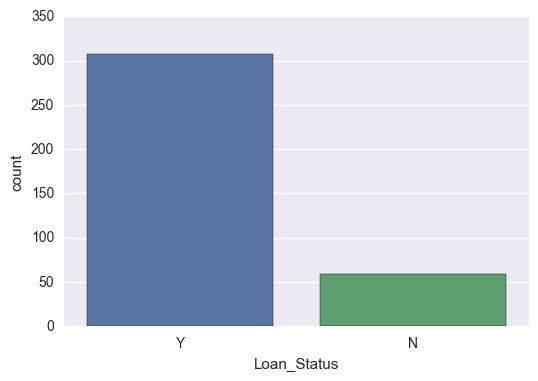

In [64]:
sns.countplot(x = "Loan_Status", data = ans)

In [65]:
ans.to_csv("AV_submission_1.csv", index = False)